<h1 style="font-family:verdana;"> <center>AI Enabled Traffic Light 🚦 Control system (ATL)</center> </h1>
<p><center style="color:#159364; font-family:cursive; font-size:20px;">Thanks for visiting my notebook </center></p>

***

<center><img src='https://cdn.dribbble.com/users/2427581/screenshots/9163220/media/0c136c43440accb2745aa313b606504d.gif' height=150px width=600px></center>

# 🔬Overview 

<div style="padding: 20px;">
<h2>Problem</h2>
<p style="font-size:15px; font-family:verdana; line-height: 1.7em">Existing traffic management systems in cities often result in traffic jams, longer waiting times, safety concerns, and environmental issues at intersections. Fixed programs or manual control of traffic signals are inadequate to handle changing traffic patterns or unexpected events like accidents or road closures. This leads to frustration for drivers and passengers, increased fuel consumption, air pollution, and a higher risk of accidents due to violations or negligence at intersections.</p>

<h2>Agitate</h2>
<p style="font-size:15px; font-family:verdana; line-height: 1.7em">Our aim in this project is to address the challenges of traffic and driver safety at intersections. We have developed an innovative system based on artificial intelligence that analyzes traffic flow, predicts volume, and enhances efficiency at simpler crossroads. By reducing waiting times for residents and drivers, minimizing fuel consumption, curbing air pollution, controlling accidents, and lowering noise levels, our solution can make a significant contribution to society.</p>
<p style="font-size:15px; font-family:verdana; line-height: 1.7em">Using machine learning algorithms and traffic cameras installed at intersections in developing countries, we will effectively manage traffic in this project. We will evaluate its impact through simulations or real-world studies to demonstrate reduced congestion, improved safety measures for people, decreased fuel usage (leading to less air pollution), and enhanced quality of life.</p>
<p style="font-size:15px; font-family:verdana; line-height: 1.7em">Overall, our project aims to leverage artificial intelligence and machine learning algorithms to optimize urban transportation by efficiently managing traffic flow at intersections. This system not only reduces commuting stress but also allows individuals more time for activities they enjoy beyond their daily commutes.
</p>

<h2>Solution</h2>
<p style="font-size:15px; font-family:verdana; line-height: 1.7em">Imagine a world where every intersection is seamlessly managed by an intelligent traffic light system. This innovative project harnesses the power of artificial intelligence to accurately predict approaching vehicles and dynamically optimize signal timings.</p>
<p style="font-size:15px; font-family:verdana; line-height: 1.7em">The result? Reduced congestion, shorter waiting times for drivers, enhanced road safety, and a greener environment with reduced fuel consumption and carbon emissions. With this cutting-edge technology deployed globally, both developed and developing countries can experience improved travel efficiency while enhancing the quality of urban life through efficient transportation systems.
</p>
</div>

<hr>



# 🏗️Import Necessary Libraries
___

In [5]:
!apt-get update
!apt-get install -y libgl1-mesa-glx

Hit:1 https://packages.cloud.google.com/apt cloud-sdk InRelease
Get:2 https://packages.cloud.google.com/apt google-fast-socket InRelease [5015 B]
Get:3 http://packages.cloud.google.com/apt gcsfuse-focal InRelease [1301 B]    
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]      
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease                         
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Reading package lists... Done                            
W: https://packages.cloud.google.com/apt/dists/google-fast-socket/InRelease: Key is stored in legacy trusted.gpg keyring (/etc/apt/trusted.gpg), see the DEPRECATION section in apt-key(8) for details.
W: http://packages.cloud.google.com/apt/dists/gcsfuse-focal/InRelease: Key is stored in legacy trusted.gpg keyring (/etc/apt/trusted.gpg

In [6]:
# Pip install method (recommended)
# %pip install ultralytics # Install Ultralytics package using pip
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.7/645.7 kB 12.9 MB/s eta 0:00:00a 0:00:01


In [7]:
!pip install squarify

In [8]:
# Importing the required libraries

# Ignoring DeprecationWarnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

from ultralytics import YOLO # Importing the YOLO object detection model from the Ultralytics library

import squarify # Importing the squarify library for treemapping visualizations

import matplotlib.pyplot as plt # Importing the pyplot module from matplotlib for plotting

import cv2 # Importing OpenCV library for computer vision tasks

import os # Importing OS module for operating system related functionalities

import random # Importing random module for generating random numbers or choices

import pandas as pd # Importing Pandas library for data manipulation and analysis

import matplotlib.image as mpimg #Importing image module from matplotlib to read images 

import seaborn as sns  #Import Seaborn library to enhance visualization aesthetics
sns.set_style('darkgrid') # Setting darkgrid style for seaborn plots

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 🗂️Dataset Overview
---

## Visualizing Sample Images with Corresponding Annotations

In [9]:
# Define the paths to the images and labels directories
train_images = "/kaggle/input/yolov8cardetection/train/images"
train_labels = "/kaggle/input/yolov8cardetection/train/labels"

test_images = "/kaggle/input/yolov8cardetection/test/images"
test_labels = "/kaggle/input/yolov8cardetection/test/labels"

val_images = "/kaggle/input/yolov8cardetection/valid/images"
val_labels = "/kaggle/input/yolov8cardetection/valid/labels"

In [10]:
# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 6)

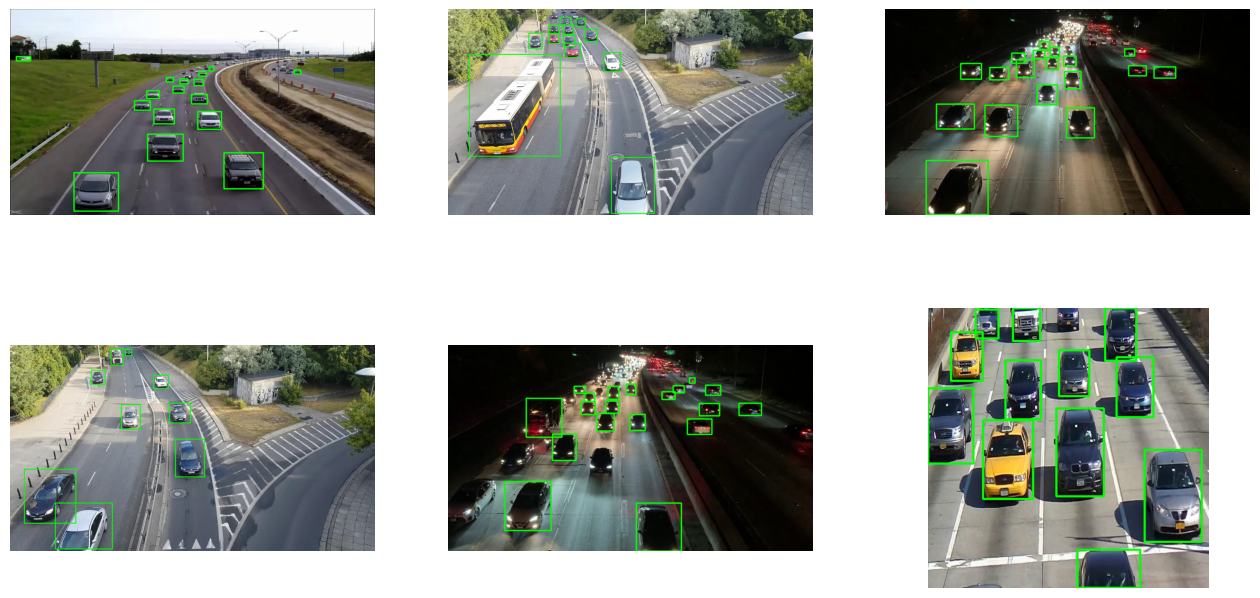

In [11]:
# Set up the plot
fig, axs = plt.subplots(2, 3, figsize=(16,8))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 3
    col = i % 3
    
    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

# Image Metadata

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">Before we start training the model, we need to set the size of our photos to a certain size, considering the available resources and the performance of the model.</p>


In [12]:
# Load an image using OpenCV
image = cv2.imread("/kaggle/input/yolov8cardetection/train/images/0_png.rf.85255ba703f2d5fe68e4250f55a03c4b.jpg")
image = cv2.resize(image, (720, 720))
if image is None:
    print(f"Failed to load image at path: {image_path}")
else:
    height, width, channels = image.shape
    print(f"The image has dimensions {width}x{height} and {channels} channels.")

The image has dimensions 720x720 and 3 channels.


# 🚀Model Training
---

In [13]:
 # Loading a pretrained model
model = YOLO('yolov8x.pt')
# Training the model
model.train(data = '/kaggle/input/yolov8cardetection/data.yaml',
            epochs = 100,
            imgsz = height,
            seed = 42,
            batch = 8,
            workers = 4)

100%|██████████| 131M/131M [00:00<00:00, 285MB/s] 


Ultralytics YOLOv8.0.217 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/input/yolov8cardetection/data.yaml, epochs=100, patience=50, batch=8, imgsz=720, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchsc

100%|██████████| 755k/755k [00:00<00:00, 25.9MB/s]
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 103MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[720] must be multiple of max stride 32, updating to [736]


train: Scanning /kaggle/input/yolov8cardetection/train/labels... 270 images, 5 backgrounds, 0 corrupt: 100%|██████████| 270/270 [00:00<00:00, 303.78it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/yolov8cardetection/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/yolov8cardetection/valid/labels... 42 images, 1 backgrounds, 0 corrupt: 100%|██████████| 42/42 [00:00<00:00, 246.16it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/yolov8cardetection/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 736 train, 736 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      9.18G      1.327      1.984      1.162        235        736: 100%|██████████| 34/34 [00:35<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.10it/s]

                   all         42        555      0.191     0.0387      0.113     0.0779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      9.91G      1.342      1.686      1.168        238        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]

                   all         42        555    0.00484    0.00151    0.00243    0.00187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      9.83G      1.349      1.303      1.191        198        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]

                   all         42        555    0.00484    0.00151    0.00243    0.00187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      10.1G       1.47      1.197      1.267        128        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         42        555    0.00216     0.0825    0.00122   0.000482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      9.93G      1.428      1.043      1.221        253        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         42        555      0.582      0.104      0.077     0.0378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      9.59G      1.363      0.939       1.22        183        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         42        555      0.474      0.178      0.204      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      9.73G      1.283     0.8653      1.176         66        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         42        555     0.0119     0.0934    0.00716    0.00414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      9.71G      1.262     0.8406      1.176        186        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         42        555      0.266      0.403      0.283      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      9.77G      1.259     0.8046      1.162        197        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         42        555      0.532      0.258      0.273      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      9.72G      1.248     0.7818      1.143        180        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         42        555      0.901      0.199      0.274      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       9.6G      1.236     0.7756      1.142        196        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         42        555      0.422      0.397      0.359      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      9.63G      1.193     0.7375      1.132        147        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         42        555      0.609      0.346       0.37      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      9.79G      1.209     0.7264       1.12        219        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555       0.32      0.559      0.374      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      9.77G      1.173      0.709      1.105        239        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         42        555      0.604      0.342       0.32      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      9.76G      1.164     0.7104      1.106        236        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         42        555       0.38      0.527      0.415      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      9.69G      1.164     0.6756      1.106        192        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         42        555      0.429      0.424      0.399      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      9.67G      1.183     0.6995      1.107        184        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         42        555      0.427      0.392      0.374      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      9.66G      1.165     0.7095      1.127        214        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         42        555      0.465      0.473      0.446      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       9.7G      1.165     0.7056      1.134        182        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555      0.393      0.546      0.436      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      9.56G      1.153     0.6842      1.103        162        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         42        555      0.431      0.599      0.476      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      9.66G      1.147     0.6681      1.104        109        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         42        555       0.35      0.559      0.405      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      9.64G      1.118     0.6479      1.095        215        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         42        555      0.481      0.493      0.468      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      9.61G      1.147      0.671      1.102        179        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         42        555      0.313       0.59      0.426      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      9.72G      1.132     0.6832      1.119        219        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         42        555       0.39      0.432      0.378      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      9.62G      1.144      0.665      1.086        141        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555      0.324      0.477      0.381      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      9.51G       1.12     0.6483      1.081        183        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         42        555      0.447      0.457      0.412      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      9.72G      1.107     0.6376      1.077        229        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555      0.479      0.529      0.492      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      9.86G      1.101     0.6294      1.077        182        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         42        555      0.529      0.476      0.471      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      9.62G      1.115     0.6572      1.085         89        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         42        555      0.474      0.476      0.419      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      9.72G      1.122     0.6425      1.088        220        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555       0.42      0.652      0.487      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      9.58G      1.136      0.642      1.079        145        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         42        555      0.433      0.544      0.482      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      9.63G      1.096      0.628      1.075        169        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555      0.542      0.492      0.471      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      9.68G      1.102     0.6195      1.087        152        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555      0.622      0.451      0.477       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      9.72G      1.109     0.6268      1.085        328        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555      0.593      0.553      0.555      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      9.81G      1.087     0.6079      1.075        148        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         42        555      0.497      0.597      0.504      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       9.8G      1.087     0.6229      1.058        204        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         42        555      0.489      0.546      0.502      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      9.77G      1.066     0.6088      1.042        168        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         42        555      0.562      0.565      0.528      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      9.76G      1.084       0.61      1.048        124        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         42        555      0.532      0.577      0.525      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      9.71G      1.052     0.5949      1.047        310        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         42        555       0.52      0.528      0.525      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      9.55G      1.061     0.5879      1.045        265        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555      0.508      0.567      0.506      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      9.77G      1.039     0.5884       1.04        126        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         42        555      0.679      0.466      0.527      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       9.8G      1.055      0.594      1.048        208        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         42        555      0.446      0.482      0.463      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      9.69G      1.037     0.5786      1.035        192        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         42        555      0.632      0.518      0.534      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      9.76G      1.065     0.5747      1.046        154        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         42        555      0.604      0.547      0.564      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      9.72G      1.057     0.5755      1.047        142        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555      0.567      0.551      0.535      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      9.78G      1.017     0.5602      1.031        180        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         42        555      0.521      0.562      0.508      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      9.63G      1.036     0.5663      1.044        145        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         42        555      0.428      0.554      0.447      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      9.63G      1.029     0.5745      1.038        140        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555       0.67      0.441      0.531      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      9.77G      1.028      0.558      1.031        116        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555      0.558      0.514      0.521      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       9.7G      1.018     0.5514      1.028        278        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         42        555      0.645       0.55      0.588      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      9.58G      1.004     0.5575      1.024        206        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         42        555      0.597       0.62      0.588       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      9.73G     0.9966     0.5438      1.031         98        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         42        555       0.63      0.625      0.608      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      9.84G      1.009     0.5347       1.03        177        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555      0.619      0.505      0.513      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      9.71G      1.009     0.5504      1.025        211        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555      0.652      0.527      0.566      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      9.59G      1.002     0.5512      1.021        198        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         42        555      0.624      0.593      0.609      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      9.76G     0.9787     0.5481       1.01        106        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         42        555      0.699      0.555      0.553      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      9.85G      1.026     0.5476      1.032        196        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         42        555      0.521      0.619      0.538      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      9.72G      1.007     0.5359       1.03        158        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555      0.586      0.541      0.534      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       9.8G      0.987     0.5299      1.015        232        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         42        555      0.584      0.539      0.537      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      9.82G     0.9983      0.529      1.024        126        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555      0.571       0.61      0.494      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      9.86G       1.01     0.5308      1.021        188        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555      0.498      0.635      0.529      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      9.75G     0.9933     0.5159      1.012        138        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         42        555      0.471      0.626      0.543      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      9.82G     0.9785      0.521      1.022        199        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]

                   all         42        555      0.553       0.58      0.578      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      9.74G     0.9392     0.5185     0.9897        194        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         42        555      0.564      0.575      0.567      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      9.67G     0.9406     0.4966      1.004        143        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555      0.638      0.552      0.579      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      9.74G     0.9353      0.502     0.9876        232        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555      0.617      0.551      0.559      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      9.72G     0.9529     0.5092     0.9991        139        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         42        555      0.616      0.555      0.528      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      9.76G     0.9459     0.5046      1.005        162        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         42        555      0.679      0.532       0.56      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      9.63G     0.9441     0.5029     0.9944        154        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555      0.563      0.567      0.553      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       9.7G     0.9393     0.4958      1.013        246        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         42        555      0.549      0.545      0.514      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      9.57G     0.9256     0.4869     0.9972        123        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         42        555      0.662      0.539      0.539      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      9.65G     0.9216     0.4854     0.9811        149        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555      0.703      0.505      0.574      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      9.85G     0.9083     0.4816     0.9847        172        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         42        555      0.568      0.616      0.561      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      9.72G      0.924      0.476     0.9881        134        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         42        555      0.628      0.598      0.579      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      9.62G      0.904     0.4846     0.9975        197        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555      0.569       0.66      0.591      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      9.86G     0.8969     0.4654      0.974        159        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         42        555      0.649      0.599      0.611      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      9.78G     0.8917     0.4774      0.992        147        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         42        555      0.683      0.544      0.602      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      9.72G     0.9079     0.4729     0.9867        162        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555      0.664      0.542      0.577      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100       9.5G      0.908      0.485     0.9778        163        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         42        555      0.547      0.629      0.579      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      9.75G     0.8924     0.4644     0.9766        142        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         42        555       0.62      0.531      0.567      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      9.75G     0.8908     0.4782      0.977        179        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555      0.557        0.6      0.578      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       9.7G       0.89      0.471     0.9638        201        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555      0.572      0.604      0.594      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      9.74G     0.8624       0.45     0.9626        215        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555      0.596      0.569      0.596      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      9.73G     0.8608     0.4438     0.9817        196        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555      0.579      0.578      0.574      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      9.66G     0.8771     0.4418     0.9689        207        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         42        555      0.564      0.571      0.565      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      9.68G     0.8612     0.4623     0.9577        133        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         42        555      0.568      0.632      0.574      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      9.71G     0.8529     0.4445     0.9585        178        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         42        555      0.607      0.582      0.563       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      9.77G     0.8463     0.4393     0.9577        148        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555      0.608      0.565       0.57       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      9.79G     0.8455     0.4397      0.963        220        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555      0.543      0.614      0.575      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      9.72G     0.8694     0.4378      0.962        177        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555      0.567      0.608      0.551      0.347


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      9.53G     0.8757     0.4496     0.9909        133        736: 100%|██████████| 34/34 [00:33<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         42        555      0.583      0.571      0.549      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      9.55G     0.8505     0.4296     0.9637        116        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555      0.616      0.531      0.558      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      9.67G      0.841     0.4329     0.9658        118        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         42        555      0.538      0.611      0.562       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       9.7G      0.841     0.4293     0.9691         60        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         42        555      0.529      0.603      0.556      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      9.52G     0.8354     0.4229     0.9559         99        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555      0.501      0.647      0.546      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      9.57G     0.8259     0.4199     0.9602        130        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555       0.53      0.623      0.545      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      9.72G     0.8083     0.4153     0.9446        148        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555      0.493      0.653      0.558      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      9.67G     0.8063     0.4072     0.9387        116        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         42        555      0.542      0.528       0.56      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      9.59G     0.8124     0.4115     0.9533         93        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         42        555      0.599      0.515      0.552       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      9.67G     0.8028     0.4121     0.9567        105        736: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         42        555      0.587      0.491      0.542      0.344



100 epochs completed in 1.065 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.8MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.217 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 268 layers, 68127420 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]


                   all         42        555      0.624      0.593      0.609      0.373
                  bike         42         14      0.709      0.643      0.574      0.301
                   bus         42         22      0.299      0.455      0.479      0.344
                   car         42        497      0.697       0.75      0.782      0.536
                 truck         42         22      0.793      0.524        0.6      0.312
Speed: 2.0ms preprocess, 30.6ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train


lr/pg0,▃████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▃████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▃████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▂▁▃▄▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇██▇▇▇█▇▇██████▇█▇▇▇█
metrics/mAP50-95(B),▂▁▃▄▅▅▅▆▆▆▆▆▆▇▇▇▇█▇▇██▇▇▇▇▇▇▇███████▇▇██
metrics/precision(B),▃▁▆▄▅▄▅▆▄▄▅▆▅▇▆▆█▇▆▇▇▇█▇▆▇▇▇█▇█▆▇▇▇▆▇▆▆▇
metrics/recall(B),▁▁▃▅▅▇▆▆▇▇▆▆▇▇▇▇▆▇▇▇█▇▇▇█▇▇▇▆▇▇█▇▇▇█▇▇█▇
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,███▇▆▆▆▆▅▅▅▅▅▅▅▄▄▄▄▄▄▄▃▃▄▃▃▃▂▃▂▂▂▂▂▂▂▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a3f132f8400>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

# 📈Model Performance
---
<div style="background-color:#f2f2f2; padding: 20px;">
    
<h3>Train Box Loss:</h3>
<p style="font-size:15px; font-family:verdana; line-height: 1.7em; ">The train box loss metric measures the difference between the predicted bounding boxes and the actual bounding boxes of the objects in the training data. A lower box loss means that the model's predicted bounding boxes more closely align with the actual bounding boxes.</p>
    
<h3>Train Class Loss:</h3>
<p style="font-size:15px; font-family:verdana; line-height: 1.7em; ">The train class loss metric measures the difference between the predicted class probabilities and the actual class labels of the objects in the training data. A lower class loss means that the model's predicted class probabilities more closely align with the actual class labels.</p>

<h3>Train DFL Loss:</h3>
<p style="font-size:15px; font-family:verdana; line-height: 1.7em; ">The train DFL (Dynamic Feature Learning) loss metric measures the difference between the predicted feature maps and the actual feature maps of the objects in the training data. A lower DFL loss means that the model's predicted feature maps more closely align with the actual feature maps.</p>
    
<h3>Metrics Precision (B):</h3>
<p style="font-size:15px; font-family:verdana; line-height: 1.7em; ">The metrics precision (B) metric measures the proportion of true positive detections among all the predicted bounding boxes. A higher precision means that the model is better at correctly identifying true positive detections and minimizing false positives.</p>
    
<h3>Metrics Recall (B):</h3>
<p style="font-size:15px; font-family:verdana; line-height: 1.7em; ">The metrics recall (B) metric measures the proportion of true positive detections among all the actual bounding boxes. A higher recall means that the model is better at correctly identifying all true positive detections and minimizing false negatives.</p>
    
<h3>Metrics mAP50 (B):</h3>
<p style="font-size:15px; font-family:verdana; line-height: 1.7em; ">The metrics mAP50 (B) metric measures the mean average precision of the model across different object categories, with a 50% intersection-over-union (IoU) threshold. A higher mAP50 means that the model is better at accurately detecting and localizing objects across different categories.</p>
    
<h3>Metrics mAP50-95 (B):</h3>
<p style="font-size:15px; font-family:verdana; line-height: 1.7em; ">The metrics mAP50-95 (B) metric measures the mean average precision of the model across different object categories, with IoU thresholds ranging from 50% to 95%. A higher mAP50-95 means that the model is better at accurately detecting and localizing objects across different categories with a wider range of IoU thresholds.</p>
</div>

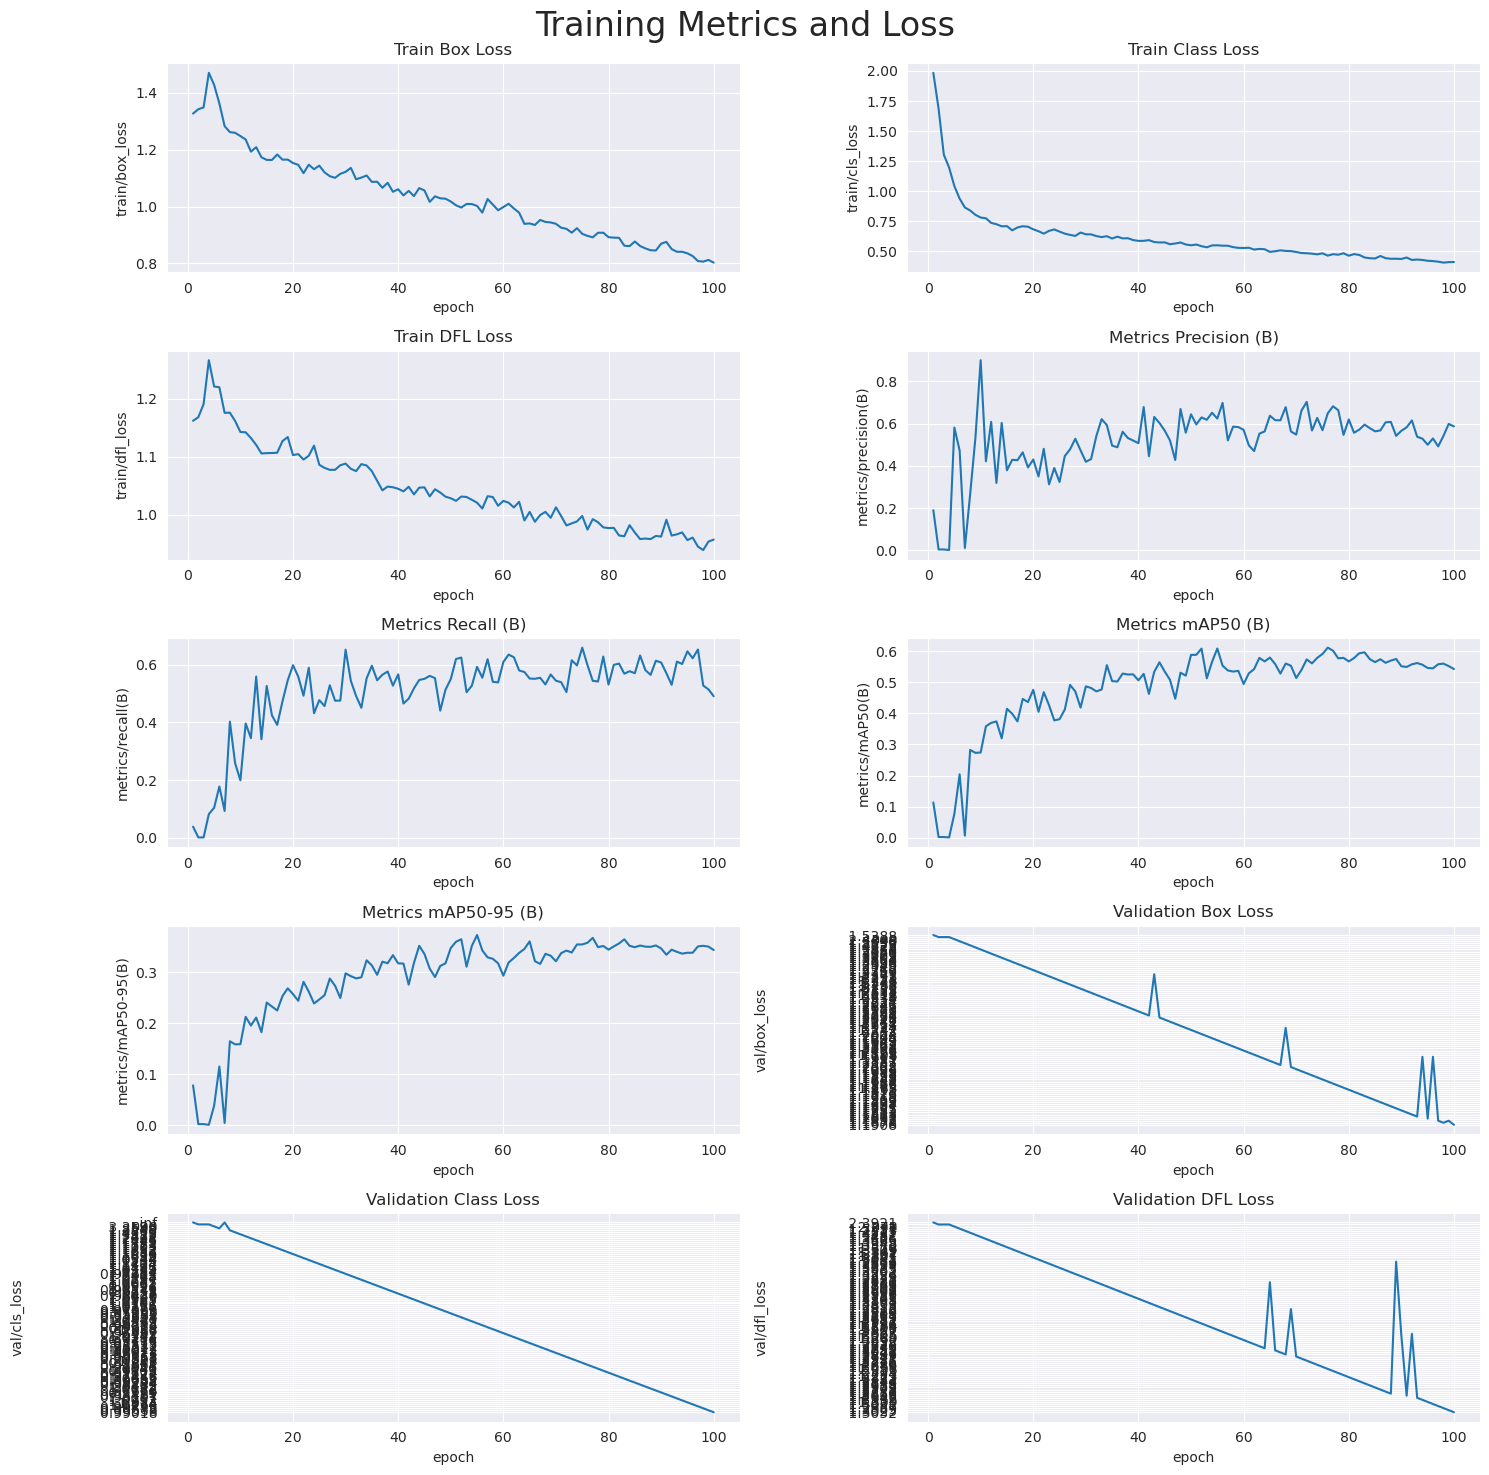

In [14]:
%matplotlib inline
# read in the results.csv file as a pandas dataframe
df = pd.read_csv('/kaggle/working/runs/detect/train/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

# 📊Evaluation
---

<div style="background-color:#f2f2f2; padding: 20px;">
<h2>mAP Metrics</h2>
<p style="font-size:15px; font-family:verdana; line-height: 1.7em; ">Mean Average Precision (mAP) is a popular evaluation metric in object detection, including the YOLO model. It is used to assess the accuracy of an object detection model by measuring how well it can detect objects in an image, as well as the precision of those detections. mAP takes into account both the number of correctly identified objects and the quality of the detections, which means that it is a robust metric for assessing the performance of an object detection model.</p>

<p style="font-size:15px; font-family:verdana; line-height: 1.7em; ">In YOLO, mAP is particularly important because it measures the accuracy of the model in detecting objects of interest. The higher the mAP, the better the model is at identifying objects in an image. Since YOLO is an object detection model designed for real-time applications, achieving high mAP scores is crucial to ensure that the model can accurately detect objects in real-world scenarios. A high mAP score indicates that the model can effectively identify objects and can be used with confidence in real-world applications.</p>

<p style="font-size:15px; font-family:verdana; line-height: 1.7em; ">However, it is worth noting that mAP is not a perfect metric and has its limitations. For example, it does not account for the difficulty of detecting certain types of objects or the importance of different object classes. Nevertheless, it remains a widely used and valuable metric for evaluating object detection models such as YOLO. With its ability to provide a reliable assessment of a model's ability to detect objects, mAP is an essential tool for both researchers and practitioners in the field of computer vision.</p>
</div>

In [15]:
%matplotlib inline
# Loading the best performing model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Evaluating the model on the test dataset
metrics = model.val(conf = 0.25, split = 'test')

Ultralytics YOLOv8.0.217 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 268 layers, 68127420 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /kaggle/input/yolov8cardetection/test/labels... 10 images, 12 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<00:00, 242.99it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/yolov8cardetection/test is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]


                   all         22        223      0.423      0.152      0.127     0.0791
                  bike         22         12          1          0          0          0
                   bus         22          3          0          0          0          0
                   car         22        205      0.428      0.274       0.39      0.245
                 truck         22          3      0.263      0.333      0.119     0.0716
Speed: 4.3ms preprocess, 37.5ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/val


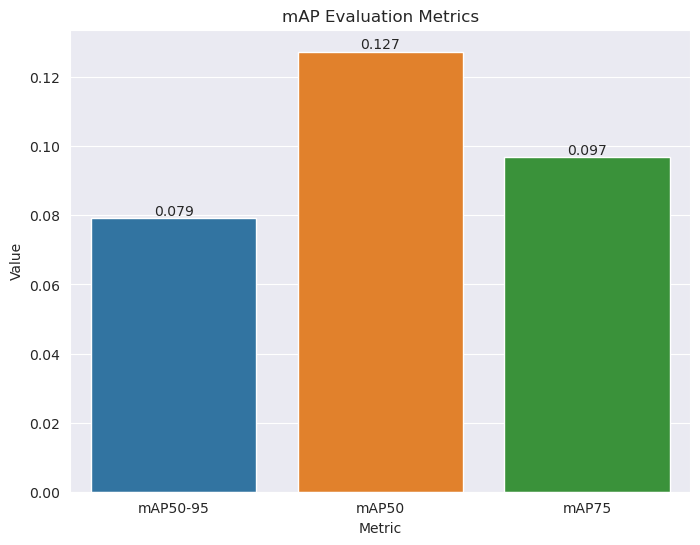

In [16]:
%matplotlib inline
# Create the barplot
ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

# Set the title and axis labels
ax.set_title('mAP Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
# Show the plot
plt.show()

<div style="background-color:#f2f2f2; padding: 20px;">
<h2>Confusion Matrix</h2>
<p style="font-size:15px; font-family:verdana; line-height: 1.7em; ">Confusion matrix is a useful tool in evaluating the performance of object detection algorithms like YOLO. In object detection, the confusion matrix can be used to calculate various performance metrics like precision, recall, and F1 score. The confusion matrix is a table that summarizes the true positive, true negative, false positive, and false negative predictions made by the model. In the case of ship detection using YOLO, the confusion matrix can be used to evaluate the model's performance in detecting ships in aerial images.</p>

<p style="font-size:15px; font-family:verdana; line-height: 1.7em; ">The rows of the confusion matrix represent the ground truth labels (i.e., the actual presence or absence of a ship in the image), while the columns represent the predicted labels (i.e., the model's prediction of the presence or absence of a ship). The true positives (TP) represent the cases where the model correctly predicts the presence of a ship, while the true negatives (TN) represent the cases where the model correctly predicts the absence of a ship. The false positives (FP) represent the cases where the model incorrectly predicts the presence of a ship when there is none, while the false negatives (FN) represent the cases where the model incorrectly predicts the absence of a ship when there is one. By looking at these values, we can calculate various performance metrics that can help us evaluate the model's performance.</p>

<p style="font-size:15px; font-family:verdana; line-height: 1.7em; ">Overall, the confusion matrix is a useful tool in evaluating the performance of object detection algorithms like YOLO. By using this tool, we can calculate various performance metrics like precision, recall, and F1 score, which can help us understand how well the model is performing in detecting ships in aerial images. This, in turn, can help us improve the model by identifying areas where it is making mistakes and tweaking the model's architecture and parameters accordingly.</p>
</div>

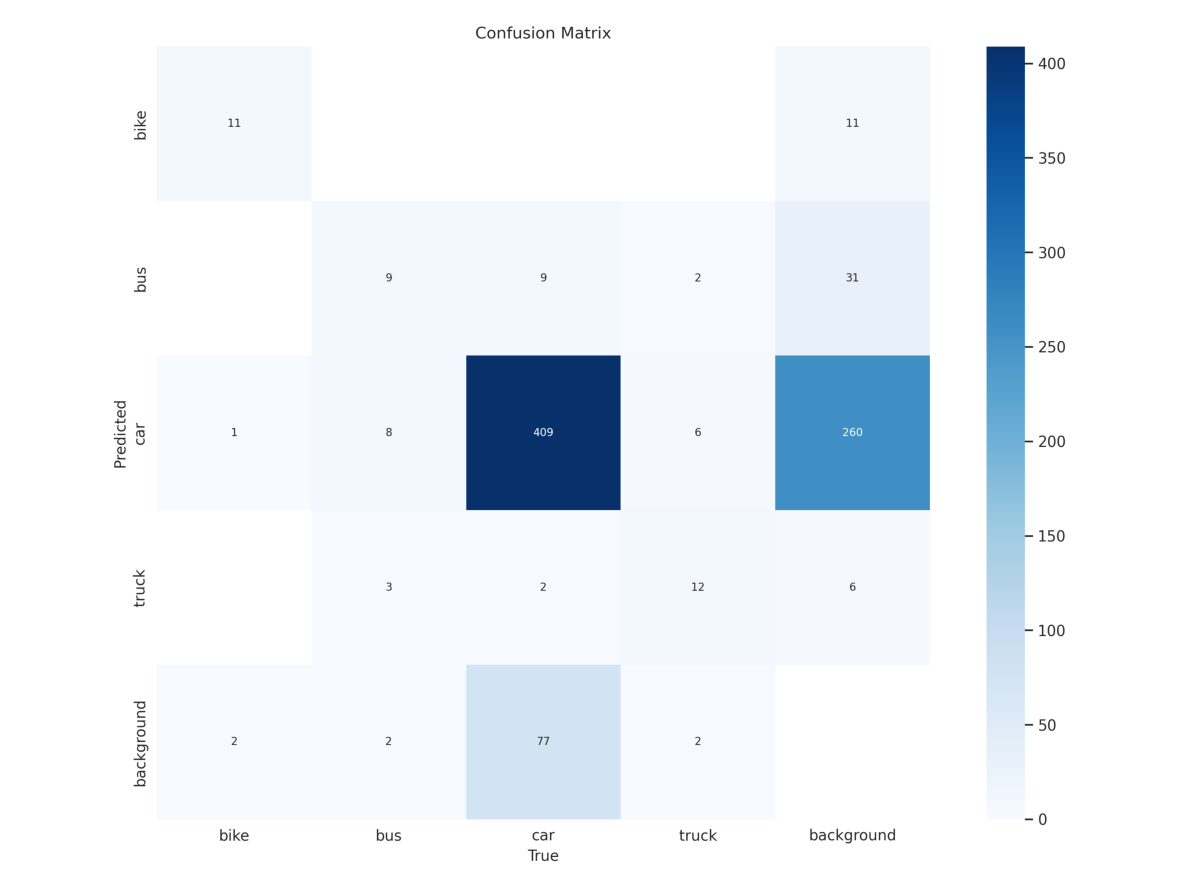

In [17]:
%matplotlib inline
# Reading the confusion matrix image file
img = mpimg.imread('/kaggle/working/runs/detect/train/confusion_matrix.png')

# Plotting the confusion matrix image
fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');

# 🔮Making Predictions on Test Images
---

In [18]:
# Function to perform ship detections
def car_detect(img_path):
    
    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()
    
    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img


0: 416x736 1 bus, 11 cars, 66.8ms
Speed: 2.6ms preprocess, 66.8ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 bike, 1 bus, 10 cars, 28.5ms
Speed: 3.2ms preprocess, 28.5ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 736)

0: 736x736 30 cars, 43.2ms
Speed: 4.7ms preprocess, 43.2ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 736)

0: 736x736 9 cars, 2 trucks, 42.5ms
Speed: 4.5ms preprocess, 42.5ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 736)


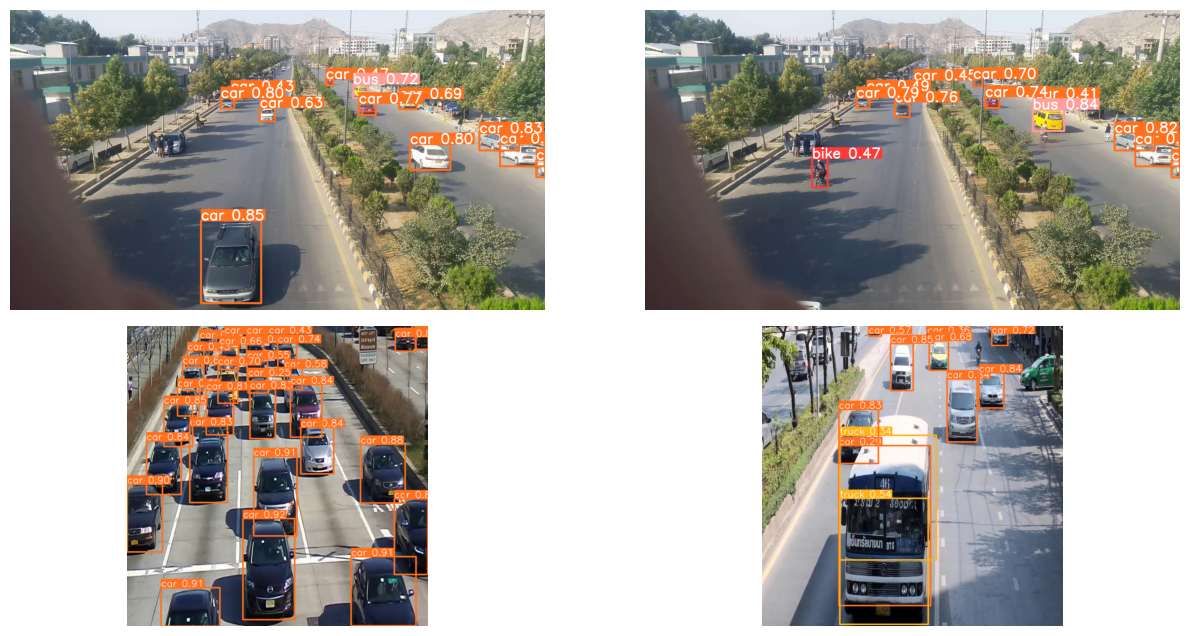

In [19]:
import random

# Define the directory where the custom images are stored
custom_image_dir = '/kaggle/input/yolov8cardetection/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 4)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,8))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):
    
    # Compute the row and column index of the current subplot
    row_idx = i // 2
    col_idx = i % 2
    
    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = car_detect(img_path)
    
    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots

plt.subplots_adjust(wspace=0.05, hspace=0.05)